# Computação quântica determinística com 1 qubit (DQC1)

## Cálculos básicos
Esse modelo considera um qubit, que chamaremos de _qubit puro_, inicialmente preparado em um estado $\rho$, mais $n$ qubits preparados no estado maximamente misto $I/d$, com 
$$d=2^n.$$
O estado global inicial é portanto
$$\rho_0 = \rho\otimes \frac{I}{d},$$
em que $I=I_d$ é a matriz identidade $d\times d$.

Depois disso, se aplica uma porta controlada com o qubit puro como controle:
$$C_U = |0\rangle\langle 0|\otimes I + |1\rangle\langle 1|\otimes U .$$
O estado global é fica
\begin{align}
\rho_1 & = C_U \rho_0 C_U^\dagger \\
& = \big(|0\rangle\langle 0|\otimes I + |1\rangle\langle 1|\otimes U\big)\big((\rho_{00}|0\rangle\langle0|+\rho_{01}|0\rangle\langle1|+\rho_{10}|1\rangle\langle0|+\rho_{11}|1\rangle\langle1|)\otimes I/d\big)\big(|0\rangle\langle 0|\otimes I + |1\rangle\langle 1|\otimes U^\dagger\big) \\
& = d^{-1}\big(\rho_{00}|0\rangle\langle0|\otimes I+\rho_{01}|0\rangle\langle1|\otimes I+\rho_{10}|1\rangle\langle0|\otimes U+\rho_{11}|1\rangle\langle1|\otimes U\big)\big(|0\rangle\langle 0|\otimes I + |1\rangle\langle 1|\otimes U^\dagger\big) \\
& = d^{-1}\big(\rho_{00}|0\rangle\langle0|\otimes I+\rho_{01}|0\rangle\langle1|\otimes U^\dagger+\rho_{10}|1\rangle\langle0|\otimes U+\rho_{11}|1\rangle\langle1|\otimes I\big).
\end{align}

<img src='fig_dqc1.png' width='300'>

Tomando o traço parcial, obteremos o estado do qubit puro:
\begin{align}
\rho_r & = Tr_p(\rho_1) \\
& = d^{-1}\big(\rho_{00}|0\rangle\langle0|\otimes Tr(I) + \rho_{01}|0\rangle\langle1|\otimes Tr(U^\dagger)+\rho_{10}|1\rangle\langle0|\otimes Tr(U)+\rho_{11}|1\rangle\langle1|\otimes Tr(I)\big) \\
& = d^{-1}\big(\rho_{00}|0\rangle\langle0|\otimes d+\rho_{01}|0\rangle\langle1|\otimes Tr(U^\dagger)+\rho_{10}|1\rangle\langle0|\otimes Tr(U)+\rho_{11}|1\rangle\langle1|\otimes d\big) \\
& = \rho_{00}|0\rangle\langle0| + d^{-1}Tr(U^\dagger)\rho_{01}|0\rangle\langle1| + d^{-1}Tr(U)\rho_{10}|1\rangle\langle0| + \rho_{11}|1\rangle\langle1| \\
& = \begin{bmatrix} \rho_{00} & d^{-1}Tr(U^\dagger)\rho_{01} \\ d^{-1}Tr(U)\rho_{10} & \rho_{11}\end{bmatrix} \\
& = \frac{1}{2}\begin{bmatrix} 1+\langle Z\rangle & \langle X\rangle-i\langle Y\rangle \\ \langle X\rangle+i\langle Y\rangle & 1-\langle Z\rangle\end{bmatrix},
\end{align}
em que na última igualdade escrevemos o estado $\rho_r$ em termos da base de Pauli $\{I_2,X,Y,Z\}.$

Com isso, se o qubit puro tem coerência quântica não nula, fazendo-se medidas no qubit "puro" podemos estimar o traço da matriz unitária:
$$Tr(U) = \frac{d}{2\rho_{10}}\big(\langle X\rangle+i\langle Y\rangle\big).$$

Acontece que problemas interessantes e difíceis podem ser resolvidos estimando-se o traço de uma matriz unitária, o que pode ser feito com a DQC1. Note que se o qubit puro não possuir coerência, então $Tr(U)=0$. Para um estado puro com máxima coerência, 
$$|+\rangle = 2^{-1/2}(|0\rangle+|1\rangle),$$
teremos
$$Tr(U) = d\big(\langle X\rangle+i\langle Y\rangle\big).$$
Esse caso é o que é usualmente considerado na literatura.

## Exemplo de demonstração no IBMQ

Neste exemplo, consideremos
$$U = P(\phi) = \begin{bmatrix}1&0\\0&e^{i\phi}\end{bmatrix}.$$
Temos assim que
$$d^{-1}Tr(U) = (1/2)(1+e^{i\phi}) = (1/2)(1+\cos\phi + i \sin\phi).$$
Por conseguinte
\begin{align}
& \langle X\rangle = (1+\cos\phi)/2, \\
& \langle Y\rangle = (\sin\phi)/2.
\end{align}

In [76]:
from qiskit import *
import numpy as np
import math
from matplotlib import pyplot as plt
import qiskit
nshots = 8192
IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibmq_belem')
simulator = Aer.get_backend('qasm_simulator')
from qiskit.tools.monitor import job_monitor
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
#from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
from qiskit.visualization import plot_histogram

ibmqfactory.load_account:WARNING:2023-02-28 20:05:49,556: Credentials are already in use. The existing account in the session will be replaced.


In [45]:
def qc_dqc1(ph):
    qr = QuantumRegister(3)
    qc = QuantumCircuit(qr, name='DQC1')
    qc.h(0)
    qc.h(1) # cria o estado de Bell dos qubits 1 e 2, que equivale ao estado de 1 sendo maximamente misto
    qc.cx(1,2)
    #qc.barrier()
    qc.cp(ph, 0, 1)
    return qc

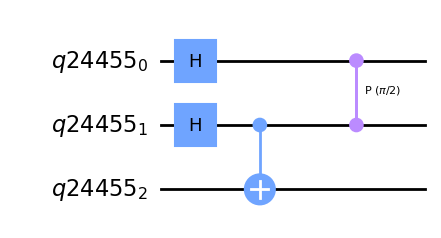

In [91]:
ph = math.pi/2
qc_dqc1_ = qc_dqc1(ph)
qc_dqc1_.draw('mpl')

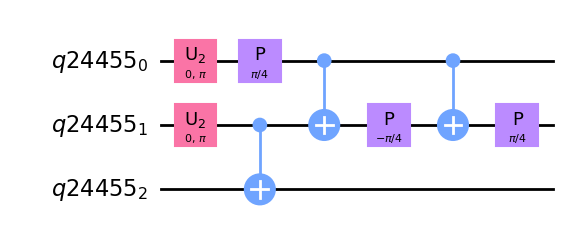

In [94]:
qc_dqc1_.decompose().draw('mpl')

In [47]:
def pTraceL_num(dl, dr, rhoLR): # Retorna traco parcial sobre L de rhoLR
    rhoR = np.zeros((dr, dr), dtype=complex)
    for j in range(0, dr):
        for k in range(j, dr):
            for l in range(0, dl):
                rhoR[j,k] += rhoLR[l*dr+j,l*dr+k]
            if j != k:
                rhoR[k,j] = np.conj(rhoR[j,k])
    return rhoR


def pTraceR_num(dl, dr, rhoLR): # Retorna traco parcial sobre R de rhoLR
    rhoL = np.zeros((dl, dl), dtype=complex)
    for j in range(0, dl):
        for k in range(j, dl):
            for l in range(0, dr):
                rhoL[j,k] += rhoLR[j*dr+l,k*dr+l]
        if j != k:
            rhoL[k,j] = np.conj(rhoL[j,k])
    return rhoL

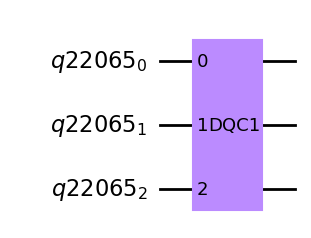

In [72]:
# simulation
phmax = 2*math.pi
dph = phmax/20
ph = np.arange(0,phmax+dph,dph)
d = len(ph);
xm = np.zeros(d)
ym = np.zeros(d)
for j in range(0,d):
    qr = QuantumRegister(3)
    qc = QuantumCircuit(qr)
    qc_dqc1_ = qc_dqc1(ph[j])
    qc.append(qc_dqc1_, [0,1,2])
    qstc = state_tomography_circuits(qc, [1,0])
    job = execute(qstc, backend=simulator, shots=nshots)
    qstf = StateTomographyFitter(job.result(), qstc)
    rho_01 = qstf.fit(method='lstsq')
    rho_0 = pTraceR_num(2, 2, rho_01)
    xm[j] = 2*rho_0[1,0].real
    ym[j] = 2*rho_0[1,0].imag
qc.draw('mpl')

In [77]:
# experiment
phmax = 2*math.pi
dph = phmax/10
ph_exp = np.arange(0,phmax+dph,dph)
d = len(ph_exp);
xm_exp = np.zeros(d)
ym_exp = np.zeros(d)
for j in range(0,d):
    qr = QuantumRegister(3)
    qc = QuantumCircuit(qr)
    qc_dqc1_ = qc_dqc1(ph_exp[j])
    qc.append(qc_dqc1_, [0,1,2])
    qstc = state_tomography_circuits(qc, [1,0])
    job = execute(qstc, backend=device, shots=nshots)
    print(job.job_id())
    job_monitor(job)
    qstf = StateTomographyFitter(job.result(), qstc)
    rho_01 = qstf.fit(method='lstsq')
    rho_0 = pTraceR_num(2, 2, rho_01)
    xm_exp[j] = 2*rho_0[1,0].real
    ym_exp[j] = 2*rho_0[1,0].imag

63fe88e4a8f65ffd34efec34
Job Status: job has successfully run
63fe8953d299e30c854b4b7d
Job Status: job has successfully run
63fe89cbdfd0c1b5360c0e3b
Job Status: job has successfully run
63fe8a4da29ce133488be27b
Job Status: job has successfully run
63fe8ada7ad0f924aba7de2c
Job Status: job has successfully run
63fe8b5ee24a071ea73b8ebb
Job Status: job has successfully run
63fe8bd4da181c386ed96869
Job Status: job has successfully run
63fe8c53e24a07667a3b8ec0
Job Status: job has successfully run
63fe8d01d299e3aa554b4ba0
Job Status: job has successfully run
63fe8d6ea29ce14b188be29c
Job Status: job has successfully run
63fe8e0eda181cee77d9687b
Job Status: job has successfully run


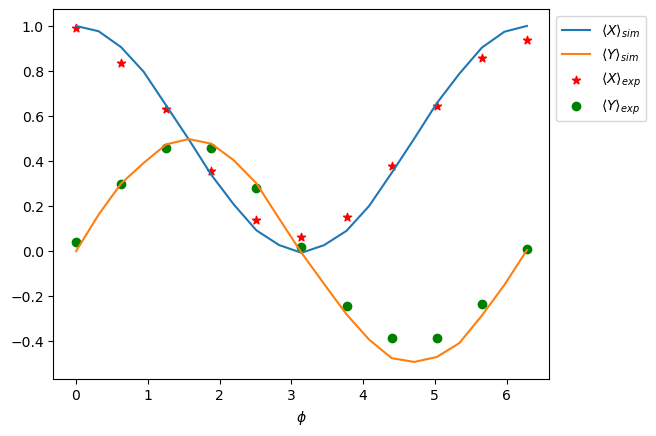

In [90]:
plt.plot(ph, xm, label = r'$\langle X\rangle_{sim}$')#, marker='*')
plt.plot(ph, ym, label = r'$\langle Y\rangle_{sim}$')#, marker='o')
plt.scatter(ph_exp, xm_exp, label = r'$\langle X\rangle_{exp}$', marker='*', color='r')
plt.scatter(ph_exp, ym_exp, label = r'$\langle Y\rangle_{exp}$', marker='o', color='g')
plt.legend(bbox_to_anchor=(1, 1))#,loc='center right')
#plt.xlim(0,2*math.pi)
#plt.ylim(-1,1)
plt.xlabel(r'$\phi$')
plt.show()

## Generalização da DQC1

Uma possível modificação do DQC1 é trocar os estados maximamente mistos, $I/d$, por estados mistos $\sigma$ com entropia que pode variar entre $0$ e $1$. Neste caso, o estado inicial será
$$\rho_0 = \rho\otimes\sigma.$$

Seguindo, aplicamos a porta unitária controlada:
\begin{align}
\rho_1 & = C_U \rho_0 C_U^\dagger \\
& = \big(|0\rangle\langle 0|\otimes I + |1\rangle\langle 1|\otimes U\big)\big((\rho_{00}|0\rangle\langle0|+\rho_{01}|0\rangle\langle1|+\rho_{10}|1\rangle\langle0|+\rho_{11}|1\rangle\langle1|)\otimes \sigma\big)\big(|0\rangle\langle 0|\otimes I + |1\rangle\langle 1|\otimes U^\dagger\big) \\
& = \big(\rho_{00}|0\rangle\langle0|\otimes \sigma + \rho_{01}|0\rangle\langle1|\otimes \sigma + \rho_{10}|1\rangle\langle0|\otimes U\sigma + \rho_{11}|1\rangle\langle1|\otimes U\sigma\big)\big(|0\rangle\langle 0|\otimes I + |1\rangle\langle 1|\otimes U^\dagger\big) \\
& = \rho_{00}|0\rangle\langle0|\otimes \sigma+\rho_{01}|0\rangle\langle1|\otimes \sigma U^\dagger+\rho_{10}|1\rangle\langle0|\otimes U\sigma +\rho_{11}|1\rangle\langle1|\otimes U\sigma U^\dagger.
\end{align}

Tomando o traço parcial, obteremos
\begin{align}
\rho_r & = Tr_p(\rho_1) \\
& = \rho_{00}|0\rangle\langle0|\otimes Tr(\sigma) + \rho_{01}|0\rangle\langle1|\otimes Tr(\sigma U^\dagger) + \rho_{10}|1\rangle\langle0|\otimes Tr(U\sigma) + \rho_{11}|1\rangle\langle1|\otimes Tr(U\sigma U^\dagger) \\
& = \rho_{00}|0\rangle\langle0| + \langle U^\dagger\rangle_\sigma\rho_{01}|0\rangle\langle1| + \langle U\rangle_\sigma\rho_{10}|1\rangle\langle0| + \rho_{11}|1\rangle\langle1| \\
& = \rho_{00}|0\rangle\langle0| + \langle U\rangle_\sigma^{*}\rho_{01}|0\rangle\langle1| + \langle U\rangle_\sigma\rho_{10}|1\rangle\langle0| + \rho_{11}|1\rangle\langle1| \\
& = \begin{bmatrix} \rho_{00} & \langle U\rangle_\sigma^{*}\rho_{01} \\ \langle U\rangle_\sigma\rho_{10} & \rho_{11} \end{bmatrix} \\
& = \frac{1}{2}\begin{bmatrix} 1+\langle Z\rangle & \langle X\rangle-i\langle Y\rangle \\ \langle X\rangle+i\langle Y\rangle & 1-\langle Z\rangle \end{bmatrix}.
\end{align}
O valor médio da unitária é então dado por
$$\langle U\rangle_\sigma = \frac{1}{2\rho_{10}}\big(\langle X\rangle+i\langle Y\rangle\big).$$

Claro, se 
$$\sigma=I/d,$$
teremos que 
$$\langle U\rangle_{I/d} = Tr(U(I/d))=d^{-1}Tr(U),$$
e recuperamos o caso particular original.

Acima usamos 
$$\langle U^\dagger\rangle=\langle U\rangle^*,$$
que é obtido como segue. Considere a decomposição espectral
$$U=\sum_j u_j|u_j\rangle\langle u_j|\ \therefore\ U^\dagger=\sum_j u_j^*|u_j\rangle\langle u_j|.$$
Teremos assim que
\begin{align}
\langle U^\dagger\rangle_\sigma & = Tr(U^\dagger\sigma) \\
& = \sum_j u_j^*\langle u_j|\sigma|u_j\rangle \\
& = \big(\sum_j u_j\langle u_j|\sigma|u_j\rangle\big)^* \\
& = \langle U\rangle^*_\sigma.
\end{align}

Vemos portanto que essa generalização da DQC1 nos permite estimar o valor médio de uma transformação unitária qualquer aplicando-se o circuito da DQC1 e medindo-se valores médios de 2 observáveis de um único qubit. Na sequência veremos o __teste de Hadamard__, que é bem similar e tem aplicações importantes, tais como no algoritmo variacional para solução de sistemas de equações lineares.

## Correlações quânticas na DQC1

Ver ref. 2

## Termodinâmica Quântica da DQC1
Ver ref. 3

## Speedup da DCQ1
ver ref. 4

### Referências

1. B. P. Lanyon, M. Barbieri, M. P. Almeida, and A. G. White, “Experimental Quantum Computing without Entanglement,” Phys. Rev. Lett., vol. 101, no. 20, p. 200501, Nov. 2008, doi: 10.1103/PhysRevLett.101.200501.

1. E. I. Goettems, T. O. Maciel, D. O. Soares-Pinto, and E. I. Duzzioni, “Promoting quantum correlations in deterministic quantum computation with a one-qubit model via postselection,” Phys. Rev. A, vol. 103, no. 4, p. 042416, Apr. 2021, doi: 10.1103/PhysRevA.103.042416.

1. J. Xuereb, S. Campbell, J. Goold, and A. Xuereb, “Deterministic quantum computation with one-clean-qubit model as an open quantum system,” Phys. Rev. A, vol. 107, no. 4, p. 042222, Apr. 2023, doi: 10.1103/PhysRevA.107.042222.

1. S. Fu, J. He, X. Li, and S. Luo, “Uncertainties and coherence in DQC1,” Phys. Scr., 2023, doi: 10.1088/1402-4896/acc5ba.

